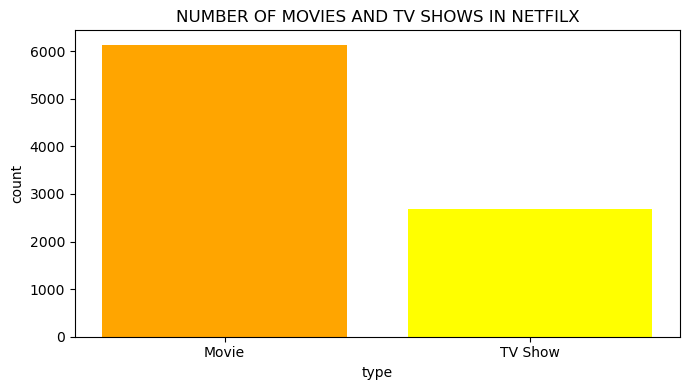

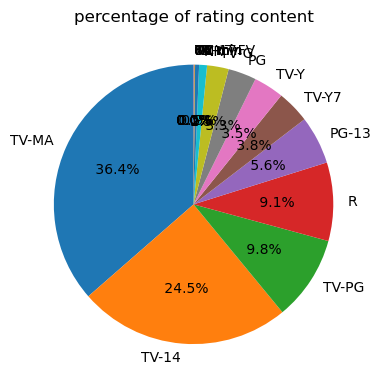

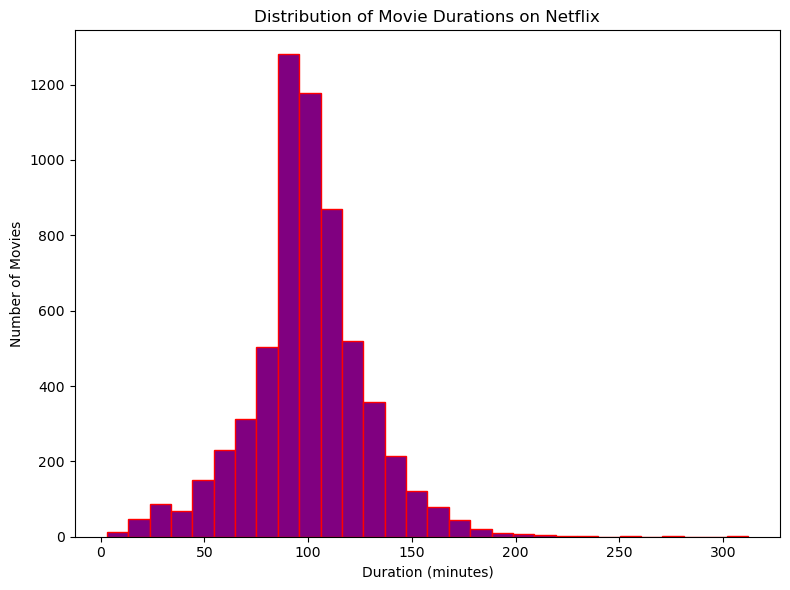

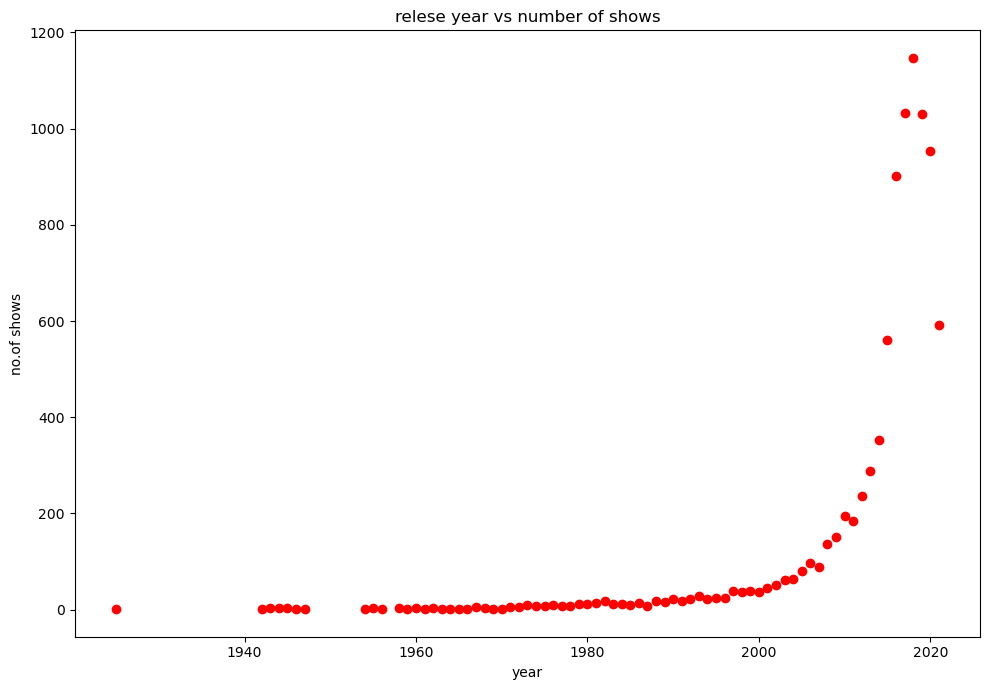

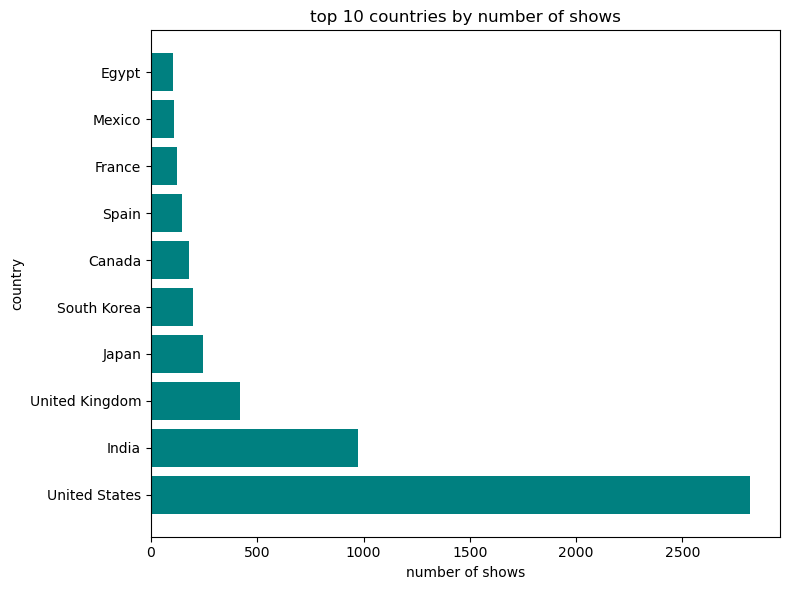

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


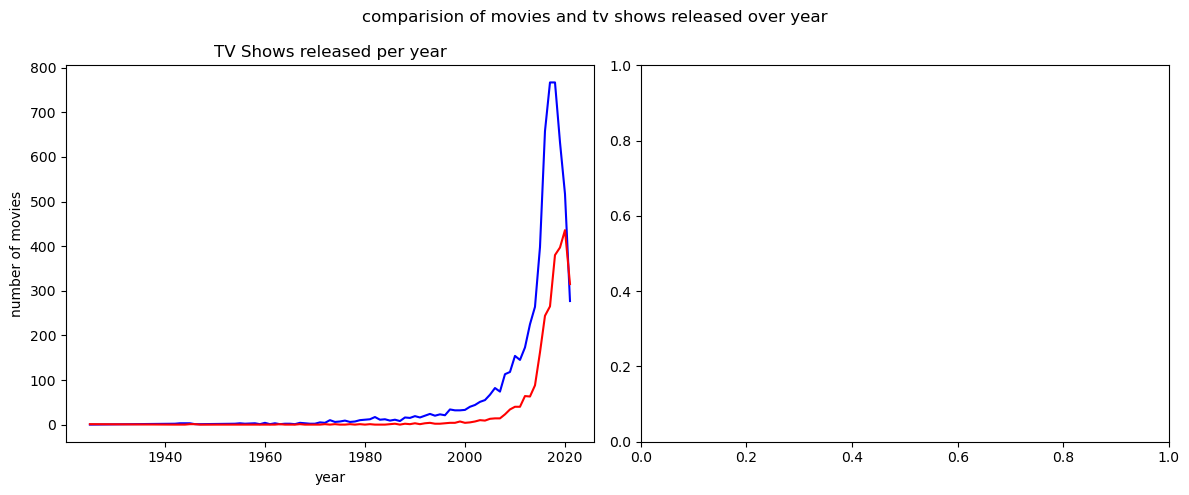

In [ ]:
# import required library:

import matplotlib.pyplot as plt
import pandas as pd

#read first 5 line data: 
df=pd.read_csv('netflix_titles.csv.zip')
df.head()

#remove dublicates entries:
df.dropna(subset=["show_id",	"type",	"title",	"director" , "cast",	"country",	"date_added",	"release_year",	"rating",	"duration",	"listed_in",	"description"])

#bar chart between tv show and movie:
type_count= df['type'].value_counts()
plt.figure(figsize=(7,4))
plt.bar(type_count.index,type_count.values,color=['orange','yellow'])
plt.title('NUMBER OF MOVIES AND TV SHOWS IN NETFILX')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('TVshows_vs_MOVIES.png')
plt.show()

# pie chart of rating distribution:
rating_count=df['rating'].value_counts()
plt.figure(figsize=(4,6))
plt.pie(rating_count,labels=rating_count.index,autopct=" %1.1f%% ",startangle=90)
plt.title('percentage of rating content')
plt.tight_layout()
plt.savefig('content_rating_pie.png')

# movies distribution using histogram:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df = movie_df[movie_df['duration'].str.contains('min', na=False)]         # Filter only movies and keep only durations with 'min'
movie_df['duration int'] = movie_df['duration'].str.replace('min', '', regex=False).astype(int)      # Convert duration to integer

plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration int'], bins=30, color='purple', edgecolor='red')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Durations on Netflix')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

# sactter plot relase year vs number of shows:
release_count= df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.scatter(release_count.index,release_count.values,color='red')
plt.title('relese year vs number of shows')
plt.xlabel('year')
plt.ylabel('no.of shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

# top contries release number of shows by horizental bar:
country_count= df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index,country_count.values,color='teal')
plt.title('top 10 countries by number of shows')
plt.xlabel('number of shows')
plt.ylabel('country')
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

#subplot movies vs tv shows
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax=plt.subplots(1,2,figsize=(12,5))
#first subplot:   movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('movies released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

#first subplot:   tv shows
ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='red')
ax[0].set_title('TV Shows released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')
fig.suptitle('comparision of movies and tv shows released over year')
plt.tight_layout()
plt.savefig('movies_tvshows_comparison.png')

df.to_csv()

